# Classification on CIFAR 10 Dataset

Instructions - 
1. In order to kick start, code for setting up the dataframes has already been given (Step 1 to 5)
2. Go through the entire code written below and put the relavent comment for each line of code. Understanding below mentioned code is very important.
3. After commenting the code in step 1 to 5, complete step 6 and 7

### Step - 1 (Setup Code)

In [25]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Step - 2 (Download the dataset)

In [2]:
# # Use this code to download the dataset for the first time
# # You will be required to install wget using pip
# # For Linux users checkout the alternative for 'del'
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!del cifar-10-python.tar.gz

'wget' is not recognized as an internal or external command,
operable program or batch file.
tar: Error opening archive: Failed to open 'cifar-10-python.tar.gz'
Could Not Find C:\Users\luhar\Projects\Innomatics-Research-Lab\cifar-10-python.tar.gz


### Step - 3 (Load the Dataset)

In [15]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))


def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y


def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


### Step - 4 (Visualization)

Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

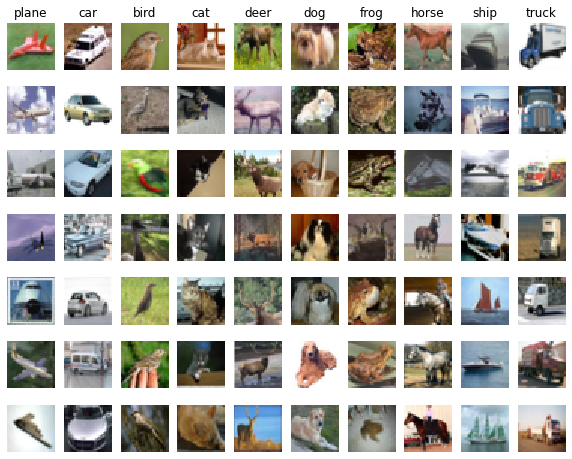

In [16]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

### Step - 5 (Flattening the images)

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [17]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


### Step - 6 (Apply all possible classification algorithms)

For each algo complete the following steps with appropriate plots, diagrams and code - 
1. Discuss the intuition behind each algorithm
2. Mention pros and cons
3. Discuss about Model parameters and Hyperparameters
4. Discuss about overfitting and underfitting with relavant plots and code (Hint: Use cross validation and plot hyperparameter vs accuracy score)
5. Discuss about train and test time/space complexities
6. Measure the performance of model using various metrics and write in detail about each metric

In [18]:
#scaling the image
X_train=X_train/255
X_test=X_test/255

<h2> Load the model from sklearn library</h2>

In [35]:
#import sklearn and other modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import datetime
import seaborn as sns

<p><b> There are 3072 columns in the dataset, which make it enough large for the multi classifier algorithm. For applying any ML algorithm we require a lot of time. That why we are using PCA (Principal Component Analysis). PCA reduce the dimension of the the dataset.</b></p>

In [20]:
#PCA
start = datetime.datetime.now()
pca = PCA(n_components=100)
pca.fit(X_train,y_train)

train_X_pca = pca.transform(X_train)
test_X_pca = pca.transform(X_test)

finish = datetime.datetime.now() - start
print('PCA runtime:', finish)

PCA runtime: 0:00:01.618786


<h2> Prediction using Logistic Regression </h2>
<p> This algorithm is used when you have to predict the the probabilities of succesfull events and unsuccefull events.  It is used when the dependent variable is binary(0/1, True/False, Yes/No) in nature. It learns a linear relationship from the given dataset and then introduces a non-linearity in the form of the Sigmoid function.</p>
<li><b> Advantages of Logistic Regression</b></li>
<ol>
    <li>It performs good when the dataset can be seperated linear boundaries.
    <li>It is less prone to overfitting because it use linear boundaries which is less likely to overfit. 
    <li>It is easier to implement, interpret and efficient to train. 
    <li> To avoid overfitting, we can do use regularization. It gives nice fitting of boundaries
</ol>
<li><b> Disadvantages of Logistic Regression</b></li>
<ol>
    <li> It is using linear model but still have chance to get overfitting according to data.
    <li> Many other classfication algorithm in ML like SVM, Decision Tree and Boosting Classfier are there which can give better result.
    <li>Because of its Linear Model sometimes it fails, when more restrition is required.
    <li> It is not immune to missing data unlike some other machine learning models such as decision trees and random forests which are based on trees.
</ol>



<h3> Important Parameter of the Logistic Regression </h3><br>
    <li> <b>penalty</b>:- options are {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}
To do regularization we add penalty to the model. 'l2' is default. 'elasticnet' is used when we have to add both 'l1' and 'l2' regularization. <br>
    <li> <b>dual</b>:- options are {True,False}    
  Take any one from options in form of bool and do primal formulation.
    <li><b>tol</b>:- It is used to give tolerance for stopping criteria.<br>
    <li> <b>C</b> :- Take positive float as input. It is inverse of regularization strength. Smaller values specify stronger regularization<br>
      <li> <b>fit_intercept</b>: Takes bool value as input. Ask you whether you want to fit the intercept value or the constant value to your decision function.<br>
      <li> <b>solver</b>:-options are [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’].User can choose another any one optimizing algorithm from the above. Be careful while choosing penalty with the solver.<br>
<li><b>max_iter </b>:- Take an integer as input. Maximum number of iteration taken for the solver to converge<br>
<li><b> class_weight</b>:- Option can take a value of type dict or it is 'balanced'. Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as <b>n_samples / (n_classes * np.bincount(y)).<br>

    
<li><b>multi_class</b>:- Option are {‘auto’, ‘ovr’, ‘multinomial’}. Tell the model to which type of target is given. It select 'ovr' where there is binary target or solver= 'liblinear'. Otherwise it select 'multi_class'.<br>
<li><b> warm_start</b>:- Take bool values as input. It uses the previous solution for the fit as initialization. Otherwise erase the solution and do fresh start. <br>
<li><b>n_jobs</b>:- Tell no of cores of CPU used to processing the parallelizing the work. <br>
           
    
            
<h4> Some of the Hyperparamter of Logistic Regression is: Solver, Penalty, class_weight, multi_class.</h4>
         

          

In [22]:
max_iter=[8000,10000,12000]
C=[0.6,0.8,1]
dual=[True,False]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)
model_lr=LogisticRegression(solver='liblinear')
model=GridSearchCV(estimator=model_lr,param_grid=param_grid,cv = 5)
start_time = datetime.datetime.now()
grid_result = model.fit(train_X_pca,y_train)
# Summarize results
print(grid_result)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((datetime.datetime.now() - start_time)) + 's')

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.6, 0.8, 1], 'dual': [True, False],
                         'max_iter': [8000, 10000, 12000]})
Best: 0.360400 using {'C': 0.6, 'dual': True, 'max_iter': 8000}
Execution time: 0:11:12.004058s


In [26]:
result_from_lr=pd.DataFrame()
result_from_lr['params']=grid_result.cv_results_['params']
for i in range(5):
    result_from_lr['split'+str(i)+'_result']=grid_result.cv_results_['split'+str(i)+'_test_score']
result_from_lr.set_index(inplace=True,keys=['params'])

<AxesSubplot:xlabel='params'>

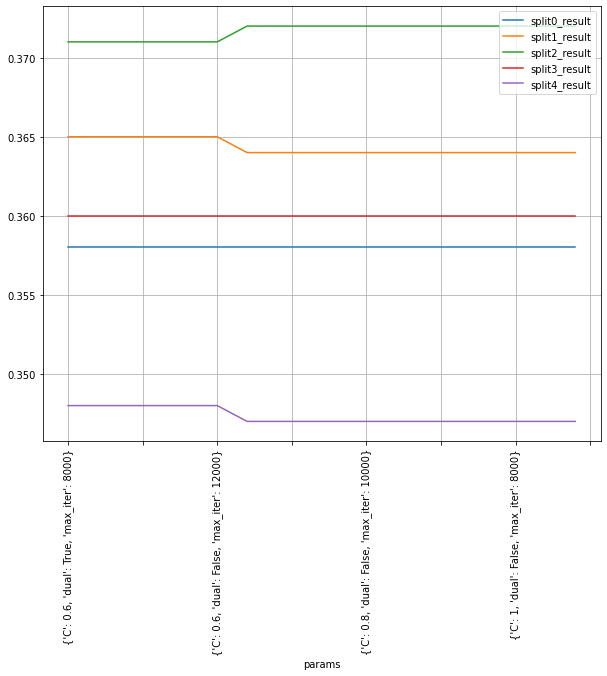

In [27]:
result_from_lr.plot(grid=True,rot=90)

<AxesSubplot:>

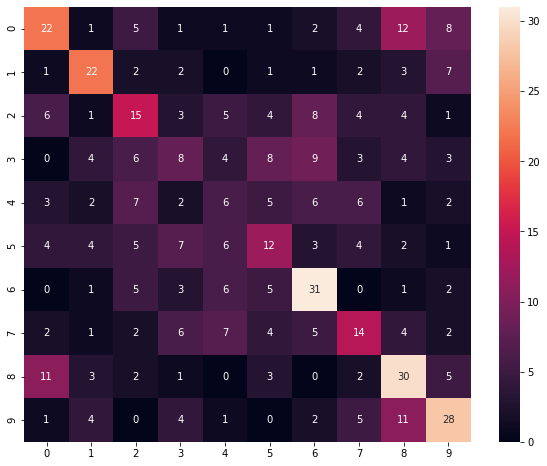

In [29]:
y_pred_lr=model.predict(test_X_pca)
sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot=True)

In [30]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.44      0.39      0.41        57
           1       0.51      0.54      0.52        41
           2       0.31      0.29      0.30        51
           3       0.22      0.16      0.19        49
           4       0.17      0.15      0.16        40
           5       0.28      0.25      0.26        48
           6       0.46      0.57      0.51        54
           7       0.32      0.30      0.31        47
           8       0.42      0.53      0.47        57
           9       0.47      0.50      0.49        56

    accuracy                           0.38       500
   macro avg       0.36      0.37      0.36       500
weighted avg       0.37      0.38      0.37       500



<h2> Conclusion from Logistic Regression</h2>
<p>After Hyperparameter tuning we conclude that the best training accuracy is : 0.360400 using {'C': 0.6, 'dual': True, 'max_iter': 8000}. Total test accuracy is 38%. It cause the underfitting. </p>

<h2> Prediction using Gaussina Naive-Byes </h2>
<p> Gaussian Naive Byes are used when we are working on continous values and these values are associated with each class which is distributed along normal. </p>
<li><b> Advantages of Gaussian Naive-Byes</b></li>
<ol>
    <li> Fast and Flexible model which give a highly reliable result.
    <li> Works well with large datast.
    <li> Provides better grading performance by eleiminating insignificant specification
    <li> There is no need to spend much time for training
</ol>
<li><b> Disadvantages of Gaussian Naive-Byes</b></li>
<ol>
    <li> Large Dat record are required to acheive   good result.
    <li> Shows lower performance than the other Classifier according to the type of problem.
</ol>



<h3> Important Parameter of the Gaussian Naive Byes Classifier in Sklearn </h3><br>
<li> <b> priors </b> :- Input should be array-like of shape.Tells Prior probabilities of the class. 
<li> <b> var_smoothing </b> :- Portion of the largest variance of all features that is added to variances for calculation stability.</li>
<h4> There are some attributes in the GaussianNB() classfier </h4>
These attributes are:<br>
a) class_count_<br>
b) class_prior_<br>
c) classes_<br>
d) epsilon_<br>
e) n_features_in_<br>
f) feature_names_in_<br>
g) sigma_<br>
h) var_<br>
i) theta_<br>

<p> This is a weak classfier. That's the reason we are using Adaboost Classfier. It is the boosting Algorithm. We are going to hypertune the adaboost classfier here</p>
<h4> Different parameter that can be used with Adaboost. These are going to be our Hyperparameter tuning for my problem. </h4>
<li><b>base_estimator</b>:- Here we have to give the base classfier name which predict the probabilities of the event.</li>
<li><b>n_estimators</b>:- The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.
<li><b>learning_rate</b>:- It is the value of weight that is applied after each boosting iteration.</li>
<li><b>algorithm</b>:- There are two algorithm:- 'SAMME', 'SAMME.R'. </li>

In [39]:
result_dir={'param':[],'score':[]}
time=[]
n_estimators=[10,20,30]
learning_rate=[0.01,0.1]
base_estimator=GaussianNB(var_smoothing=1e-2)
start=datetime.datetime.now()
for i in n_estimators:
    for j in learning_rate:
        result_dir['param'].append('n_estimator:'+str(i)+" and "+'learning_rate '+str(j))
        clf=AdaBoostClassifier(base_estimator=base_estimator,n_estimators=i,learning_rate=j)
        scores = cross_val_score(clf, train_X_pca, y_train, scoring='accuracy', cv=5)
        result_dir['score'].append(scores.mean())
        finish=(datetime.datetime.now()-start)
        time.append(finish)
        print(scores)



[0.248 0.24  0.255 0.261 0.241]
[0.311 0.296 0.325 0.313 0.308]
[0.257 0.245 0.268 0.271 0.255]
[0.329 0.33  0.35  0.341 0.351]
[0.268 0.252 0.279 0.278 0.258]
[0.329 0.346 0.352 0.352 0.364]


In [40]:
result_data_NB=pd.DataFrame(result_dir)
result_data_NB.set_index(inplace=True,keys=['param'])

<AxesSubplot:xlabel='param'>

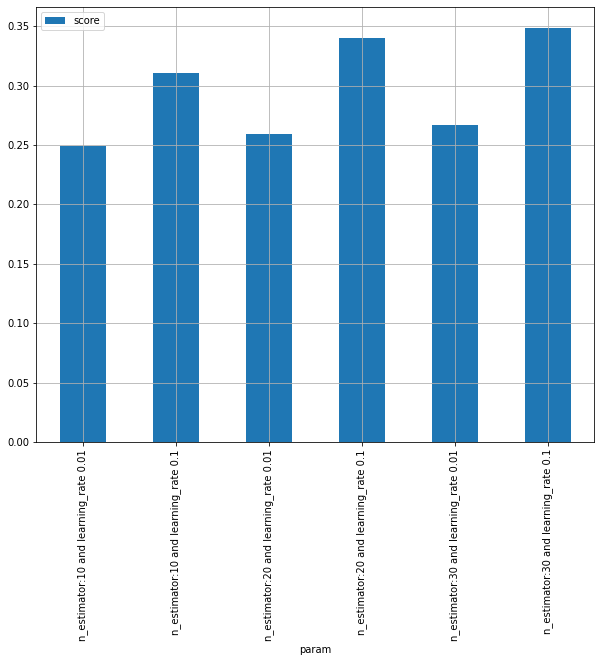

In [41]:
result_data_NB.plot(kind='bar',grid=True)

<AxesSubplot:>

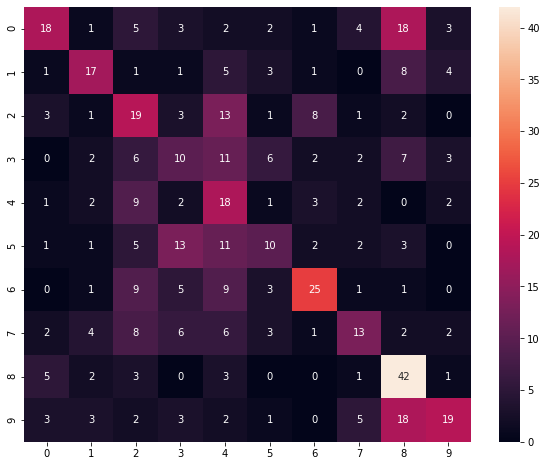

In [42]:
clf.fit(train_X_pca,y_train)
y_pred_nb=clf.predict(test_X_pca)
sns.heatmap(confusion_matrix(y_test,y_pred_nb),annot=True)

In [70]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.53      0.32      0.40        57
           1       0.50      0.41      0.45        41
           2       0.28      0.37      0.32        51
           3       0.22      0.20      0.21        49
           4       0.23      0.45      0.30        40
           5       0.33      0.21      0.26        48
           6       0.58      0.46      0.52        54
           7       0.42      0.28      0.33        47
           8       0.42      0.74      0.53        57
           9       0.56      0.34      0.42        56

    accuracy                           0.38       500
   macro avg       0.41      0.38      0.37       500
weighted avg       0.41      0.38      0.38       500



<h2> Conclusion from Gaussian Naive-Byes</h2>
<p>After Hyperparameter tuning we conclude that the best training accuracy is : 0.348  using {'n_estimator:30,learning_rate:0.1}. Total test accuracy is 38%. It cause the underfitting. </p>

<h2> Prediction using K-Nearest Neighbour </h2>
<p> It is one of the simples ML algorithm basically used for supervised Learning. It stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm. It can be used for Regression as well as for Classification but mostly it is used for the Classification problems. </p>
<li><b> Advantages of K-NN</b></li>
<ol>
    <li>It is simple to implement.
<li>It is robust to the noisy training data
<li>It can be more effective if the training data is large
</ol>
<li><b> Disadvantages of K-NN</b></li>
<ol>
    <li>Always needs to determine the value of K which may be complex some time.
<li>The computation cost is high because of calculating the distance between the data points for all the training samples.
</ol>



<h3> Important Parameter of the KNeighborsClassifier in Sklearn </h3><br>
<li><b>n_neighbors</b>:- Tell the classfier no of neighbors. By default it is 5.</li>
<li><b>weights</b>:- Option are {'uniform','distance'}. If we choose <b>uniform</b> then all points in each neighborhood are weighted equally. But if we choose 'distance' then weight points are the inverse of their distance. </li>
<li><b>algorithm</b>:- Options are {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}. Different algorithm uses different optimized way to do classfication.</li>
<li><b>leaf_size</b>:- It takes integer value. It tells the leaf size that is to passed to BallTree or KDTree.</li>
<li><b>metric</b>:-The distance metric to use for the tree. T</li>
<li><b>n_jobs</b>:-The number of parallel jobs to run for neighbors search.by the CPU.</li>

Here, n_neighbors, weights, algorithm is used as  Hyperparameter. 

In [48]:
n_neighbors=[10,11,12,14,15]
weights=['uniform','distance']
algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
param_grid = dict(n_neighbors=n_neighbors,weights=weights,algorithm=algorithm)
model_knn=KNeighborsClassifier()
knn_clf=GridSearchCV(estimator=model_knn,param_grid=param_grid,cv = 5)
start_time = datetime.datetime.now()
grid_result_knn = knn_clf.fit(train_X_pca,y_train)
# Summarize results
print(grid_result_knn)
print("Best: %f using %s" % (grid_result_knn.best_score_, grid_result_knn.best_params_))
print("Execution time: " + str((datetime.datetime.now() - start_time)) + 's')

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [10, 11, 12, 14, 15],
                         'weights': ['uniform', 'distance']})
Best: 0.321600 using {'algorithm': 'auto', 'n_neighbors': 12, 'weights': 'distance'}
Execution time: 0:00:56.717190s


In [51]:
result_model_knn=pd.DataFrame()
result_model_knn['params']=grid_result_knn.cv_results_['params']
for i in range(5):
    result_model_knn['split'+str(i)+'_result']=grid_result_knn.cv_results_['split'+str(i)+'_test_score']
result_model_knn.set_index(inplace=True,keys=['params'])

<AxesSubplot:xlabel='params'>

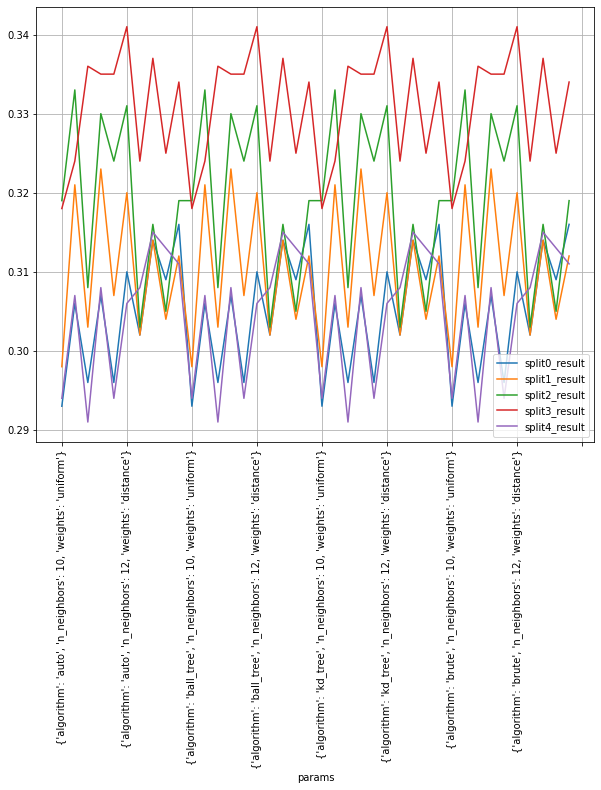

In [52]:
result_model_knn.plot(grid=True,rot=90)

<AxesSubplot:>

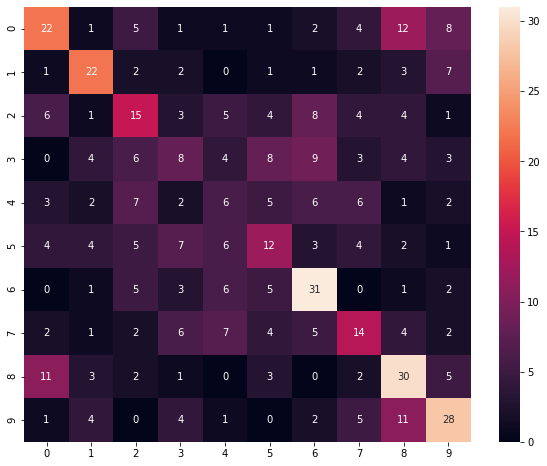

In [53]:
import seaborn as sns
y_pred_knn=model.predict(test_X_pca)
sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True)


In [69]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.44      0.39      0.41        57
           1       0.51      0.54      0.52        41
           2       0.31      0.29      0.30        51
           3       0.22      0.16      0.19        49
           4       0.17      0.15      0.16        40
           5       0.28      0.25      0.26        48
           6       0.46      0.57      0.51        54
           7       0.32      0.30      0.31        47
           8       0.42      0.53      0.47        57
           9       0.47      0.50      0.49        56

    accuracy                           0.38       500
   macro avg       0.36      0.37      0.36       500
weighted avg       0.37      0.38      0.37       500



<h2> Conclusion from KNN</h2>
<p>After Hyperparameter tuning we conclude that the best training accuracy is : Best: 0.321600 using {'algorithm': 'auto', 'n_neighbors': 12, 'weights': 'distance'}. Total test accuracy is 38%. It cause the underfitting. </p>

<h2> Prediction using Support-Vector Classfier(SVC) </h2>
<p> It is also a supervised machine Learning Algorithm. It is one of the most powerful technique for classfication. It is also used to do outlier detection. For a dataset consisting of features set and labels set, an SVM classifier builds a model to predict classes for new examples. It assigns new example/data points to one of the classes. If there are only 2 classes then it can be called as a Binary SVM Classifier. </p>
<li><b> Advantages of SVC</b></li>
<ol>
    <li>It works relatively well when there is a clear margin of separation between classes.</li>
    <li> It efficiently use memory.
    <li> It is highly effection for higher number of dimension.
    <li> It is effective in cases where the number of dimensions is greater than the number of samples.
    
</ol>
<li><b> Disadvantages of SVC</b></li>
<ol>
    <li>SVM algorithm is not suitable for large data sets.
    <li>SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.
</ol>

<h3> Important Parameter of the SVC in Sklearn</h3><br>
<li><b>C</b>:- It is the Regularization Parameter. Input should be positive float. </li>
<li><b>kernel</b>:- Option are {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}. It specifies the boundaries or the kernel used by the algorithm. </li>
<li><b>degree</b>:- It is used when the kernel is poly. It teels the algorithm to make the polynomial kernel of given degree.</li>
<li><b>gamma</b>:- Options are {‘scale’, ‘auto’}. if we choose gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma, or if user choose ‘auto’ then algorithm uses 1 / n_features. </li>

<li><b>tol</b>:- Tells about the tolrence for stopping criteria. </li>
<li><b>max_iter</b>:- Hard limit on iterations within solver, or -1 for no limit.</li>

 
 
<p> From these above parameter the Hyperparameter that we used to solve our problem are 'kernel','C','degree'.

In [56]:
from sklearn.svm import SVC

In [57]:
params_grid = [{'kernel': ['linear','rbf','poly'], 'C': [0.5,0.7,0.8,1]}]
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
start_time = datetime.datetime.now()
grid_result_svm = svm_model.fit(train_X_pca,y_train)
# Summarize results
print(grid_result_svm)
print("Best: %f using %s" % (grid_result_svm.best_score_, grid_result_svm.best_params_))
print("Execution time: " + str((datetime.datetime.now() - start_time)) + 's')

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 0.7, 0.8, 1],
                          'kernel': ['linear', 'rbf', 'poly']}])
Best: 0.432200 using {'C': 1, 'kernel': 'rbf'}
Execution time: 0:05:05.557478s


In [58]:
result_model_svm=pd.DataFrame()
result_model_svm['params']=grid_result_svm.cv_results_['params']
for i in range(5):
    result_model_svm['split'+str(i)+'_result']=grid_result_svm.cv_results_['split'+str(i)+'_test_score']
result_model_svm.set_index(inplace=True,keys=['params'])

<AxesSubplot:xlabel='params'>

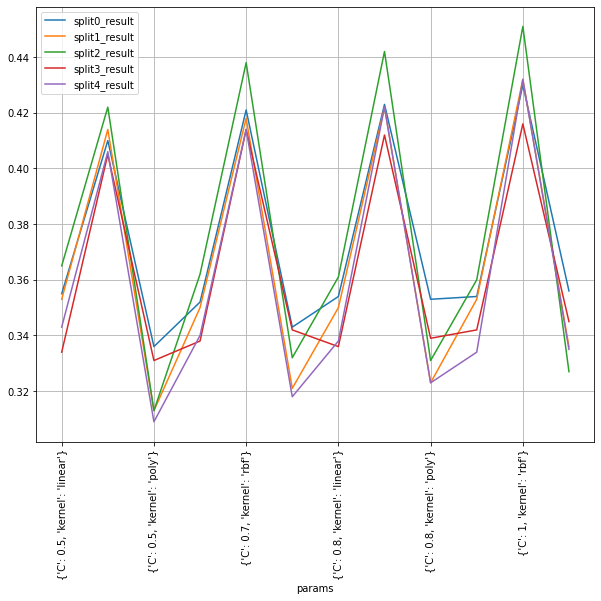

In [59]:
result_model_svm.plot(grid=True,rot=90)

<AxesSubplot:>

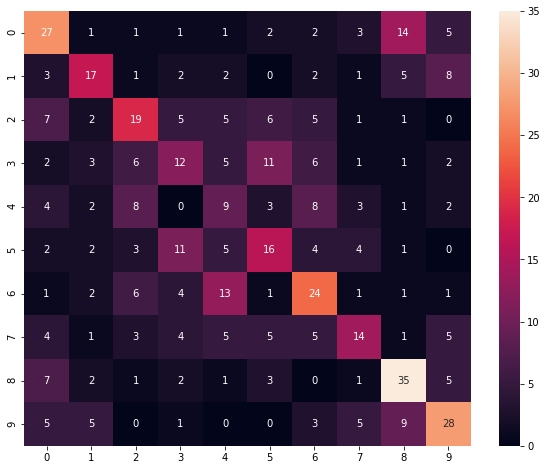

In [60]:
import seaborn as sns
y_pred=svm_model.predict(test_X_pca)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.47      0.45        57
           1       0.46      0.41      0.44        41
           2       0.40      0.37      0.38        51
           3       0.29      0.24      0.26        49
           4       0.20      0.23      0.21        40
           5       0.34      0.33      0.34        48
           6       0.41      0.44      0.42        54
           7       0.41      0.30      0.35        47
           8       0.51      0.61      0.56        57
           9       0.50      0.50      0.50        56

    accuracy                           0.40       500
   macro avg       0.39      0.39      0.39       500
weighted avg       0.40      0.40      0.40       500



<h2> Conclusion from KNN</h2>
<p>After Hyperparameter tuning we conclude that the best training accuracy is : Best: 0.432200 using {'C': 1, 'kernel': 'rbf'}. Total test accuracy is 40%. It cause the underfitting. It is better than all the above algorithm. </p>

<h2> Prediction using Decision-Tree Classifier (DT)</h2>
<p> It is also one of the most efficient classfier used by researcher as classifier. They are constructed via an algorithmic approach that identifies ways to split a data set based on different conditions. It is used for both regression as well as classfication task. </p>
<li><b> Advantages of DT</b></li>
<ol>
    <li> No data Assumption</li>
    <li> Non-Linear</li>
    <li> Discontinous </li>
    <li>Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.</li>
    
</ol>
<li><b> Disadvantages of DT</b></li>
<ol>
    <li> No Extrapolation
    <li> Need sunstantial amount of data</li>
    <li> Not descriptive </li>
</ol>

<h3> Important Parameter of the Decision Tree in Sklearn</h3><br>
<li><b>criterion</b>:- Option are 'gini' and 'entropy'. It tells the function to measure the quality of the split. </li>
<li><b>splitter</b>:- Options are 'best','random'. Tells the strategy used to choose the split at each node. </li>
<li><b>max_depth</b>:- Maximum depth of the tree</li>
<li><b>min_samples_split</b>:- he minimum number of samples required to split an internal node  </li>
<li><b>min_samples_leaf</b>:- he minimum number of samples required to be at a leaf node.</li>
<li><b>max_features</b>:- Take integer value or some options are there. like 'auto' which take sqrt(n_features), 'log2' which take log2(n_features ) to do prediction </li>
<li><b>class_weight</b>:- Weights associated with classes in the form {class_label: weight}</li>

 
 
<p> From these above parameter the Hyperparameter that we used to solve our problem are 'criterion','splitter','max_depth','min_samples_split','max_features'.

In [63]:
criterion=['gini','entropy']
splitter=['best','random']
max_depth=[3,5,7,10]
min_samples_split=[2,3,4,5]
max_features=[80,90,100]
param_grid=dict(criterion=criterion,splitter=splitter,max_depth=max_depth,min_samples_split=min_samples_split,max_features=max_features)
base_estimator_dt=DecisionTreeClassifier()
dt_model=GridSearchCV(base_estimator_dt,param_grid=param_grid,cv=5)
start_time = datetime.datetime.now()
grid_result_dt = dt_model.fit(train_X_pca,y_train)
# Summarize results
print(grid_result_dt)
print("Best: %f using %s" % (grid_result_dt.best_score_, grid_result_dt.best_params_))
print("Execution time: " + str((datetime.datetime.now() - start_time)) + 's')

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': [80, 90, 100],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']})
Best: 0.265800 using {'criterion': 'gini', 'max_depth': 5, 'max_features': 80, 'min_samples_split': 4, 'splitter': 'best'}
Execution time: 0:03:34.752024s


In [64]:
result_model_dt=pd.DataFrame()
result_model_dt['params']=grid_result_dt.cv_results_['params']
for i in range(5):
    result_model_dt['split'+str(i)+'_result']=grid_result_dt.cv_results_['split'+str(i)+'_test_score']
result_model_dt.set_index(inplace=True,keys=['params'])

<AxesSubplot:xlabel='params'>

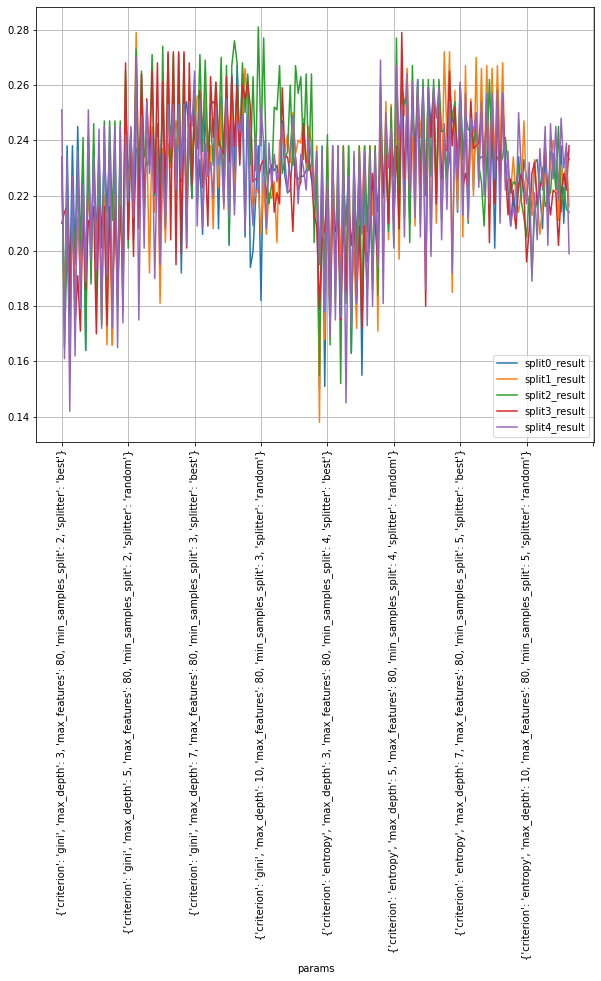

In [65]:
result_model_dt.plot(grid=True,rot=90)

<AxesSubplot:>

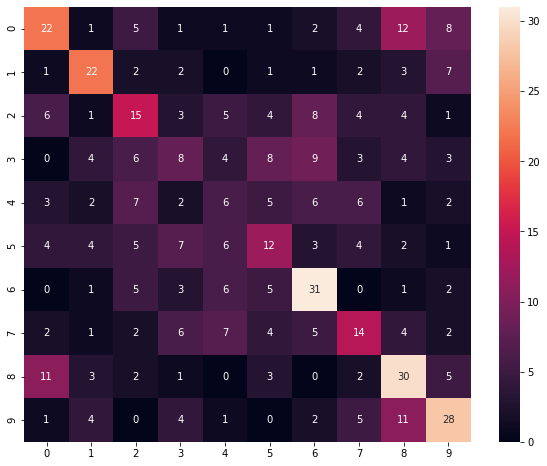

In [66]:
import seaborn as sns
y_pred_dt=model.predict(test_X_pca)
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True)


In [67]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.44      0.39      0.41        57
           1       0.51      0.54      0.52        41
           2       0.31      0.29      0.30        51
           3       0.22      0.16      0.19        49
           4       0.17      0.15      0.16        40
           5       0.28      0.25      0.26        48
           6       0.46      0.57      0.51        54
           7       0.32      0.30      0.31        47
           8       0.42      0.53      0.47        57
           9       0.47      0.50      0.49        56

    accuracy                           0.38       500
   macro avg       0.36      0.37      0.36       500
weighted avg       0.37      0.38      0.37       500



<h2> Conclusion from DT</h2>
<p>After Hyperparameter tuning we conclude that the best training accuracy is : Best: 0.265800 using {'criterion': 'gini', 'max_depth': 5, 'max_features': 80, 'min_samples_split': 4, 'splitter': 'best'}. Total test accuracy is 38%. It cause the underfitting. It is better than all the above algorithm. </p>

### Step - 7 (Compare all the models)

Conclude by following below mentioed steps -
1. Plot a table showing all the algorithms used and corresponding performance metrics
2. Is there any one algorithm that can be used on all the datasets? (Hint: Read about 'No Free Lunch' theorem)